In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

class pca:

    def __init__(self, n_componentes):
        self.n_componentes = n_componentes
        self.eigenv = None
        self.mean = None

    def fit(self, x):
        # Media de los datos
        self.mean = np.mean(x, axis=0)
        x = x - self.mean

        # Matriz de covarianza
        cov = np.cov(x.T)

        # Eigenvectores y eigenvalores
        eigenvalores, eigenvectores = np.linalg.eig(cov)

        # Ordenar los eigenvectores según los eigenvalores en orden descendente
        eigenvectores = eigenvectores.T
        idvec = np.argsort(eigenvalores)[::-1]
        eigenvectores = eigenvectores[idvec]

        # Guardar los primeros n_componentes eigenvectores
        self.eigenv = eigenvectores[0:self.n_componentes]

    def transform(self, x):
        # Proyectar los datos en el nuevo espacio reducido
        x = x - self.mean
        return np.dot(x, self.eigenv.T)

    def reconstruct(self, x_reduced):
        # Proyectar los datos de vuelta al espacio original
        return np.dot(x_reduced, self.eigenv) + self.mean


In [2]:
data=datasets.load_digits()
x=data.data
y=data.target
#150, 4
#tomar los 2 componentes principales y proyectarlos
model=pca(2)
model.fit(x)
x_proyeccion=model.transform(x)

print('x:',x.shape)
print('x proyectada:',x_proyeccion.shape)

x: (1797, 64)
x proyectada: (1797, 2)


C:\Users\BMO\AppData\Local\Temp\ipykernel_20392\1417433851.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(x1,x2,c=y, edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))


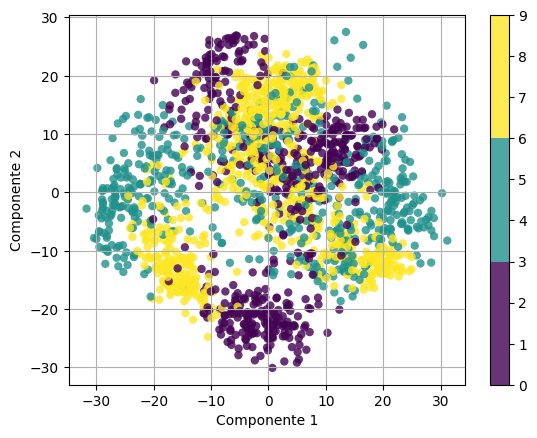

In [3]:
x1=x_proyeccion[:,0]
x2=x_proyeccion[:,1]
plt.scatter(x1,x2,c=y, edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.colorbar()
plt.show()
